In [1]:
import pandas as pd

In [2]:
l_stops_df = pd.read_csv('../resources/CTA_list_of_L_stops.csv')
l_stops_df

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,30105,N,Wilson (Howard-bound),Wilson,Wilson (Red & Purple Lines),40540,True,True,False,False,False,False,False,False,False,False,"(41.964273, -87.657588)"
296,30239,N,Addison (O'Hare-bound),Addison,Addison (Blue Line),41240,True,False,True,False,False,False,False,False,False,False,"(41.94738, -87.71906)"
297,30106,S,Wilson (95th-bound),Wilson,Wilson (Red & Purple Lines),40540,True,True,False,False,False,False,False,False,False,False,"(41.964273, -87.657588)"
298,30383,N,Washington/Wabash (Outer Loop),Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700,True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"


# Question #8

In [3]:
l_stops_df['MAP_ID'].nunique()
## The following code also gives the correct answer
#l_stops_df['STATION_DESCRIPTIVE_NAME'].nunique()

143

In [4]:
# Note that STATION_NAME often just uses the street name, but many streets have multiple, distinct stations
l_stops_df['STATION_NAME'].nunique()

108

# Question #9

In [5]:
# Setup
station_bools = l_stops_df[['MAP_ID','ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O']].groupby('MAP_ID').any()
l_stations_df = l_stops_df[['MAP_ID','STATION_NAME','STATION_DESCRIPTIVE_NAME','Location']] \
    .merge(station_bools, how='left', left_on='MAP_ID', right_index=True).drop_duplicates()
l_stations_df

,MAP_ID,STATION_NAME,STATION_DESCRIPTIVE_NAME,Location,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,40830,18th,18th (Pink Line),"(41.857908, -87.669147)",True,False,False,False,False,False,False,False,True,False
2,40120,35th/Archer,35th/Archer (Orange Line),"(41.829353, -87.680622)",True,False,False,False,False,False,False,False,False,True
4,41120,35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),"(41.831677, -87.625826)",True,False,False,True,False,False,False,False,False,False
6,41270,43rd,43rd (Green Line),"(41.816462, -87.619021)",True,False,False,True,False,False,False,False,False,False
8,40130,51st,51st (Green Line),"(41.80209, -87.618487)",True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,40220,Western,Western (Blue Line - Forest Park Branch),"(41.875478, -87.688436)",False,False,True,False,False,False,False,False,False,False
289,41690,Cermak-McCormick Place,Cermak-McCormick Place (Green Line),"(41.853115, -87.626402)",True,False,False,True,False,False,False,False,False,False
291,40540,Wilson,Wilson (Red & Purple Lines),"(41.964273, -87.657588)",True,True,False,False,False,False,True,False,False,False
292,41700,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",True,False,False,True,True,False,True,False,True,True


In [6]:
l_stations_df[['latitude','longitude']] = l_stations_df['Location'].str.replace('\(|\)','', regex=True).str.split(',',expand=True).apply(pd.to_numeric)
l_stations_df

,MAP_ID,STATION_NAME,STATION_DESCRIPTIVE_NAME,Location,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,40830,18th,18th (Pink Line),"(41.857908, -87.669147)",True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
2,40120,35th/Archer,35th/Archer (Orange Line),"(41.829353, -87.680622)",True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
4,41120,35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),"(41.831677, -87.625826)",True,False,False,True,False,False,False,False,False,False,41.831677,-87.625826
6,41270,43rd,43rd (Green Line),"(41.816462, -87.619021)",True,False,False,True,False,False,False,False,False,False,41.816462,-87.619021
8,40130,51st,51st (Green Line),"(41.80209, -87.618487)",True,False,False,True,False,False,False,False,False,False,41.802090,-87.618487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,40220,Western,Western (Blue Line - Forest Park Branch),"(41.875478, -87.688436)",False,False,True,False,False,False,False,False,False,False,41.875478,-87.688436
289,41690,Cermak-McCormick Place,Cermak-McCormick Place (Green Line),"(41.853115, -87.626402)",True,False,False,True,False,False,False,False,False,False,41.853115,-87.626402
291,40540,Wilson,Wilson (Red & Purple Lines),"(41.964273, -87.657588)",True,True,False,False,False,False,True,False,False,False,41.964273,-87.657588
292,41700,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",True,False,False,True,True,False,True,False,True,True,41.883220,-87.626189


# Question #10

In [7]:
ridership_df = pd.read_csv('../resources/CTA_ridership_daily_totals.csv')
df = pd.merge(ridership_df, l_stations_df, how='left', left_on='station_id', right_on='MAP_ID')
df

,station_id,stationname,date,daytype,rides,MAP_ID,STATION_NAME,STATION_DESCRIPTIVE_NAME,Location,ADA,...,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,41280,Jefferson Park,12/22/2017,W,6104,41280.0,Jefferson Park,Jefferson Park (Blue Line),"(41.970634, -87.760892)",True,...,True,False,False,False,False,False,False,False,41.970634,-87.760892
1,41000,Cermak-Chinatown,12/18/2017,W,3636,41000.0,Cermak-Chinatown,Cermak-Chinatown (Red Line),"(41.853206, -87.630968)",True,...,False,False,False,False,False,False,False,False,41.853206,-87.630968
2,40280,Central-Lake,12/02/2017,A,1270,40280.0,Central,Central (Green Line),"(41.887389, -87.76565)",True,...,False,True,False,False,False,False,False,False,41.887389,-87.765650
3,40140,Dempster-Skokie,12/19/2017,W,1759,40140.0,Dempster-Skokie,Dempster-Skokie (Yellow Line),"(42.038951, -87.751919)",True,...,False,False,False,False,False,True,False,False,42.038951,-87.751919
4,40690,Dempster,12/03/2017,U,499,40690.0,Dempster,Dempster (Purple Line),"(42.041655, -87.681602)",False,...,False,False,False,True,True,False,False,False,42.041655,-87.681602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036758,41700,Washington/Wabash,11/26/2020,U,601,41700.0,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189
1036759,41700,Washington/Wabash,11/27/2020,W,2093,41700.0,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189
1036760,41700,Washington/Wabash,11/28/2020,A,1782,41700.0,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189
1036761,41700,Washington/Wabash,11/29/2020,U,1222,41700.0,Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",True,...,False,True,True,False,True,False,True,True,41.883220,-87.626189


# Question #11

In [8]:
df['south_side'] = df['latitude'] < 41.881
df[['south_side','rides']].groupby('south_side').mean()

,rides
south_side,
False,3605.108521
True,2710.223723


In [9]:
# Note, the following code is incorrect, as it takes the average of averages, i.e. it finds the average daily ridership
# of each station, and takes the average of those averages for southside stations. This is incorrect, as the average of
# averages is not an average

# df = pd.merge(l_stations_df, ridership_df.groupby('station_id').mean()['rides'],  how='left', left_on='MAP_ID', right_on='station_id')
# df['south_side'] = df['latitude'] < 41.881
# df[['south_side','rides']].groupby('south_side').mean()

# Question #12

<AxesSubplot:xlabel='year'>

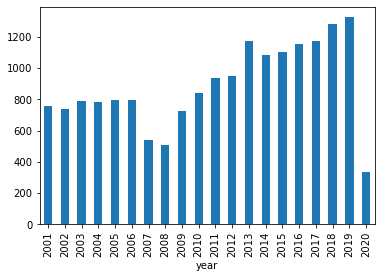

In [10]:
df['year'] = pd.to_datetime(df['date']).dt.year
rides_by_sides = df[['year','south_side','rides']] \
    .groupby(['year','south_side']).mean() \
    .reset_index() \
    .pivot(index='year',columns='south_side',values='rides')
rides_by_sides.columns = ['north','south']
(rides_by_sides['north'] - rides_by_sides['south']).plot(kind='bar')